<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Names

* Yuhang Zhu
* Jason Kang
* Aviraj Kar
* Roseleen Kaur
* Hema Muni

#Abstract

We will use a soccer dataset based on transfer evaluations for the last 12 years to look for features that determine a players valuation. We will load the data from [github](https://github.com/d2ski). Perform data preparation to fill in values and perform the EDA work to analyze the data and gain valuable insights about relationships concerning our attributes. We plan to use four different classifiers one being an ensemble method to model a binary response variable, "is_expensive".

#Purpose

Soccer or otherwise known as football is a team sport played amongst 11 players where two teams try to kick the ball into the opposing team’s goal to score goals. There are 10 outfield players and 1 pers on designated as the goalkeeper.


In this sport, the pro athletes are the ones that shine the most. Hosting one of the most well-known names in all sports such as Lionel Messi or Cristiano Ronaldo it is no surprise that these players are worth a large sum of money and that soccer itself is a booming industry. The transfer market of soccer has increased tremendously over the last decade [link](https://football-observatory.com/Monthly-Report-reveals-growing-football-transfer) going from 1.5 billion euros in 2010 to 6.6 billion in 2019. The answer we want to find by analysing this data set is are the English players more valued compared to players  from other European countries.

#Data Summary

The attributes of this dataset are : 

**league** - codename of the football league. Takes the following values:

**season** - season

**window** - transfer window (s summer or w winter)

**team_id** - team's ID as used by Transfermarkt

**team_name** - team's name

**team_country** - team's country

**dir** - transfer direction (in or left)

**player_id** - player's ID as used by Transfermarkt

**player_name** - player's name

**player_age** - player's age when transfer occurred

**player_nation** - player's nationality

**player_nation2** - player's 2nd nationality

**player_pos** - player's field position

**counter_team_id** - counter team's ID as used by Transfermarkt

**counter_team_name** - counter team's name

**counter_team_country** - counter team's country

**transfer_fee_amnt** - transfer fee amount (EUR)

**market_val_amnt** - player's market value (EUR) when transfer occurred 
estimated by Transfermarkt
**is_free** - free transfer (True or False)

**is_loan** - loan transfer (True or False)

**is_loan_end** - end of loan transfer (True or False)

**is_retired** - player retired (True or False)

**transfer_id** - transfer's ID as used by Transfermarkt

**value in player postion:**
  * RB - Right Back
  * CF - Centre Forward
  * AM - Attacking Midfielder
  * CB - Center Back
  * CM - Central Midfield
  * GK - Goalkeeper
  * LW - Left Winger
  * LB - Left Back
  * DM - Defensive Midfielder
  * SS - Second Striker
  * RW - Right Winger
  * RM - Right Midfielder
  * LM - Left Midfielder
  * RM - Right Midfielder
  * Midfield
  * Attack
  * Defence

In [ ]:
# import libraries and read the data from Github link
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
pd.set_option('display.max_columns', 500)
# read the data from github 
df = pd.read_csv(
    'https://raw.githubusercontent.com/d2ski/football-transfers-data/main/dataset/transfers.csv')
# create a copy in case
df_cp = df.copy()
# display the data frame
df.head()


,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,player_nation,player_nation2,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.00000,Ecuador,NaN,RB,1071,Wigan Athletic,England,18800000.00000,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.00000,Senegal,NaN,CF,687,Molde FK,Norway,4500000.00000,1600000.00000,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.00000,France,Guadeloupe,AM,40,FC Girondins Bordeaux,France,4000000.00000,400000.00000,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.00000,England,NaN,CF,762,Newcastle United,England,0.00000,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.00000,England,NaN,CB,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015


In [ ]:
# to see how many rows and cols in this data set
df.shape

(70006, 23)

The rows indicate 70,006 unique transfers over the course of 12 years(2009-2021).  

In [ ]:
# Check if there is a missing value in each column.
df.isnull().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
dir                         0
player_id                   0
player_name                 0
player_age                 16
player_nation               5
player_nation2          46825
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       41743
market_val_amnt         19264
is_free                     0
is_loan                     0
is_loan_end                 0
is_retired                  0
transfer_id                 0
dtype: int64

There are lots of missing values in for actual transfer fee, market value of players and player nation2. We might be better of if we drop the column for nation 2 since majority of the players represent only one nation(their primary nationality).

In [ ]:
# Check the data type of each column.
df.dtypes

league                   object
season                    int64
window                   object
team_id                   int64
team_name                object
team_country             object
dir                      object
player_id                 int64
player_name              object
player_age              float64
player_nation            object
player_nation2           object
player_pos               object
counter_team_id          object
counter_team_name        object
counter_team_country     object
transfer_fee_amnt       float64
market_val_amnt         float64
is_free                    bool
is_loan                    bool
is_loan_end                bool
is_retired                 bool
transfer_id               int64
dtype: object

There is a mix of mostly categorical and some numeric datas in this dataset.

In [ ]:
# Drop player nation2 column since our domain expertise is telling us that the secondary nationality of the players would not be a key indicator to their valuation
df.drop('player_nation2',axis=1,inplace=True)


In [ ]:
# Check how many unique values are in each column.
df.nunique()

league                      7
season                     13
window                      2
team_id                   239
team_name                 243
team_country                7
dir                         2
player_id               17580
player_name             17103
player_age                 33
player_nation             168
player_pos                 16
counter_team_id          3359
counter_team_name        3610
counter_team_country      125
transfer_fee_amnt         796
market_val_amnt           137
is_free                     2
is_loan                     2
is_loan_end                 2
is_retired                  2
transfer_id             58640
dtype: int64

There are lot's of unique values for player names and ids and as such they do not seem to be all that important as a feature to our model. Other than that, the values of all the attributes appear to be within normal range. No surprises here.

In [ ]:
df['is_free'].value_counts()

False    57036
True     12970
Name: is_free, dtype: int64

We checked if the huge number of null transfer fees are a result of free transfers. However there are only 12970 free transfers as opposed to over 41000 null transfer values. Using our domain knowledge we can explain why this is the case; in soccer there are many instances where the buyer club and player(or his agent) decide to not disclose their transfer fee resulting in a massive loss in valuable data. For our purposes we would use kNN imputation to fill in the unknown values. We recognize that another route might be to drop all the rows that have the NaN values for transfer fee. Moreover, since our target variable is heavily realiant on clean and precise transfer data, due to the imputation we might run into accuracy issues with our model.

In [ ]:
#check to see if there are any rows that have 
#Nan value for transfer fee and that are also free transfers.
val = df['transfer_fee_amnt'].tolist()
new_val = []
free = df['is_free'].tolist()
for val, free in zip(val,free):
    if free and val == np.nan:
        new_val.append(0)
    else:
        new_val.append(val)

In [ ]:
df['transfer_fee_amnt'] = new_val

In [ ]:
df.isnull().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                   0
team_country                0
dir                         0
player_id                   0
player_name                 0
player_age                 16
player_nation               5
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       41743
market_val_amnt         19264
is_free                     0
is_loan                     0
is_loan_end                 0
is_retired                  0
transfer_id                 0
dtype: int64

Unfortunately, our null values remain unchanged highlighting that all free transfers have been properly accounted for in the tranfer fee column.

In [ ]:
#  separate numeric data and categorical data to perform data imputation
numerics = ['int64','float64']
numericdf = df.select_dtypes(include=numerics)
numericdf

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id
0,2009,985,33544,23.00000,18800000.00000,NaN,310832
1,2009,985,62049,21.00000,4500000.00000,1600000.00000,319841
2,2009,985,43261,20.00000,4000000.00000,400000.00000,315185
3,2009,985,1397,29.00000,0.00000,NaN,306421
4,2009,985,73538,18.00000,NaN,NaN,339015
...,...,...,...,...,...,...,...
70001,2021,306,257808,25.00000,NaN,500000.00000,3071862
70002,2021,306,580142,22.00000,NaN,100000.00000,3268245
70003,2021,468,340353,22.00000,NaN,1000000.00000,3619917
70004,2021,468,340353,22.00000,7000000.00000,1000000.00000,3619916


In [ ]:
# import knn imputer from sklearn library and perform knn imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(numericdf)
new_df = imputer.transform(numericdf)

In [ ]:
# see dataframe after knn imputation
new_df = pd.DataFrame(new_df)
new_df


,0,1,2,3,4,5,6
0,2009.00000,985.00000,33544.00000,23.00000,18800000.00000,450000.00000,310832.00000
1,2009.00000,985.00000,62049.00000,21.00000,4500000.00000,1600000.00000,319841.00000
2,2009.00000,985.00000,43261.00000,20.00000,4000000.00000,400000.00000,315185.00000
3,2009.00000,985.00000,1397.00000,29.00000,0.00000,525000.00000,306421.00000
4,2009.00000,985.00000,73538.00000,18.00000,1020000.00000,300000.00000,339015.00000
...,...,...,...,...,...,...,...
70001,2021.00000,306.00000,257808.00000,25.00000,4000.00000,500000.00000,3071862.00000
70002,2021.00000,306.00000,580142.00000,22.00000,0.00000,100000.00000,3268245.00000
70003,2021.00000,468.00000,340353.00000,22.00000,2860000.00000,1000000.00000,3619917.00000
70004,2021.00000,468.00000,340353.00000,22.00000,7000000.00000,1000000.00000,3619916.00000


In [ ]:
# rename dataframe header
cols = ['season', 'team_id', 'player_id', 'player_age',
        'transfer_fee_amnt', 'market_val_amnt', 'transfer_id']
new_df.columns = cols
new_df

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id
0,2009.00000,985.00000,33544.00000,23.00000,18800000.00000,450000.00000,310832.00000
1,2009.00000,985.00000,62049.00000,21.00000,4500000.00000,1600000.00000,319841.00000
2,2009.00000,985.00000,43261.00000,20.00000,4000000.00000,400000.00000,315185.00000
3,2009.00000,985.00000,1397.00000,29.00000,0.00000,525000.00000,306421.00000
4,2009.00000,985.00000,73538.00000,18.00000,1020000.00000,300000.00000,339015.00000
...,...,...,...,...,...,...,...
70001,2021.00000,306.00000,257808.00000,25.00000,4000.00000,500000.00000,3071862.00000
70002,2021.00000,306.00000,580142.00000,22.00000,0.00000,100000.00000,3268245.00000
70003,2021.00000,468.00000,340353.00000,22.00000,2860000.00000,1000000.00000,3619917.00000
70004,2021.00000,468.00000,340353.00000,22.00000,7000000.00000,1000000.00000,3619916.00000


In [ ]:
# replace old column value with new column value
cols = new_df.columns
for col in cols:
    df[col] = new_df[col]

In [ ]:
# fill missing value in player nation column
df['player_nation'].fillna(method='bfill', inplace = True)
df['player_nation'].isnull().sum()

0

In [ ]:
#we take a look at the statistics of our numeric attributes
df.describe()

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id
count,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000
mean,2014.93593,1245.37373,161415.17828,24.16516,2730296.68600,3037731.38017,1518057.28659
std,3.61525,2352.68223,143527.76921,7.84512,14351886.48221,7945158.40106,919624.57110
min,2009.00000,2.00000,6.00000,12.00000,0.00000,10000.00000,68451.00000
25%,2012.00000,252.00000,50356.75000,21.00000,0.00000,260000.00000,746931.25000
50%,2015.00000,607.00000,121990.00000,23.00000,300000.00000,610000.00000,1293328.00000
75%,2018.00000,1123.00000,240341.00000,27.00000,1600000.00000,2000000.00000,2198413.75000
max,2021.00000,23826.00000,936900.00000,1775.00000,550000000.00000,160000000.00000,3633188.00000


Create a new column is_expensive that would denote if a player's market value is greater or less than the mean. This would be our binary target variable which would be classified using different models.

In [ ]:
# calculate means
mean = df['market_val_amnt'].mean()
print(mean)
# turn market val amount column into a list
list_mark = df['market_val_amnt'].tolist()
# create a list
res = []
# loop through market val amount column
# if value is above mean then append 1 (true)
# else append 0 (false)
for i in list_mark:
  if i < mean:
    res.append(0)
  else:
    res.append(1)

# turn that list into  panda dataframe
res = pd.DataFrame (res, columns = ['is_expensive'])
# create a new column in df
df['is_expensive'] = res

3037731.3801674144


In [ ]:
# count 0 and 1 in is expensive column
df['is_expensive'].value_counts()

0    56893
1    13113
Name: is_expensive, dtype: int64

We see the that the distribution is highly unbalanced so we would need to use an alogirithm like SMOTE to even out the traning data.

In [ ]:
# check null for each column after data cleaning
# will ignore player_nation2 column because will drop that column
df.isnull().sum()

league                  0
season                  0
window                  0
team_id                 0
team_name               0
team_country            0
dir                     0
player_id               0
player_name             0
player_age              0
player_nation           0
player_pos              0
counter_team_id         0
counter_team_name       0
counter_team_country    0
transfer_fee_amnt       0
market_val_amnt         0
is_free                 0
is_loan                 0
is_loan_end             0
is_retired              0
transfer_id             0
is_expensive            0
dtype: int64

In [ ]:
# display data frame stats 
df.describe()

,season,team_id,player_id,player_age,transfer_fee_amnt,market_val_amnt,transfer_id,is_expensive
count,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000,70006.00000
mean,2014.93593,1245.37373,161415.17828,24.16516,2730296.68600,3037731.38017,1518057.28659,0.18731
std,3.61525,2352.68223,143527.76921,7.84512,14351886.48221,7945158.40106,919624.57110,0.39016
min,2009.00000,2.00000,6.00000,12.00000,0.00000,10000.00000,68451.00000,0.00000
25%,2012.00000,252.00000,50356.75000,21.00000,0.00000,260000.00000,746931.25000,0.00000
50%,2015.00000,607.00000,121990.00000,23.00000,300000.00000,610000.00000,1293328.00000,0.00000
75%,2018.00000,1123.00000,240341.00000,27.00000,1600000.00000,2000000.00000,2198413.75000,0.00000
max,2021.00000,23826.00000,936900.00000,1775.00000,550000000.00000,160000000.00000,3633188.00000,1.00000


## EDA Analysis

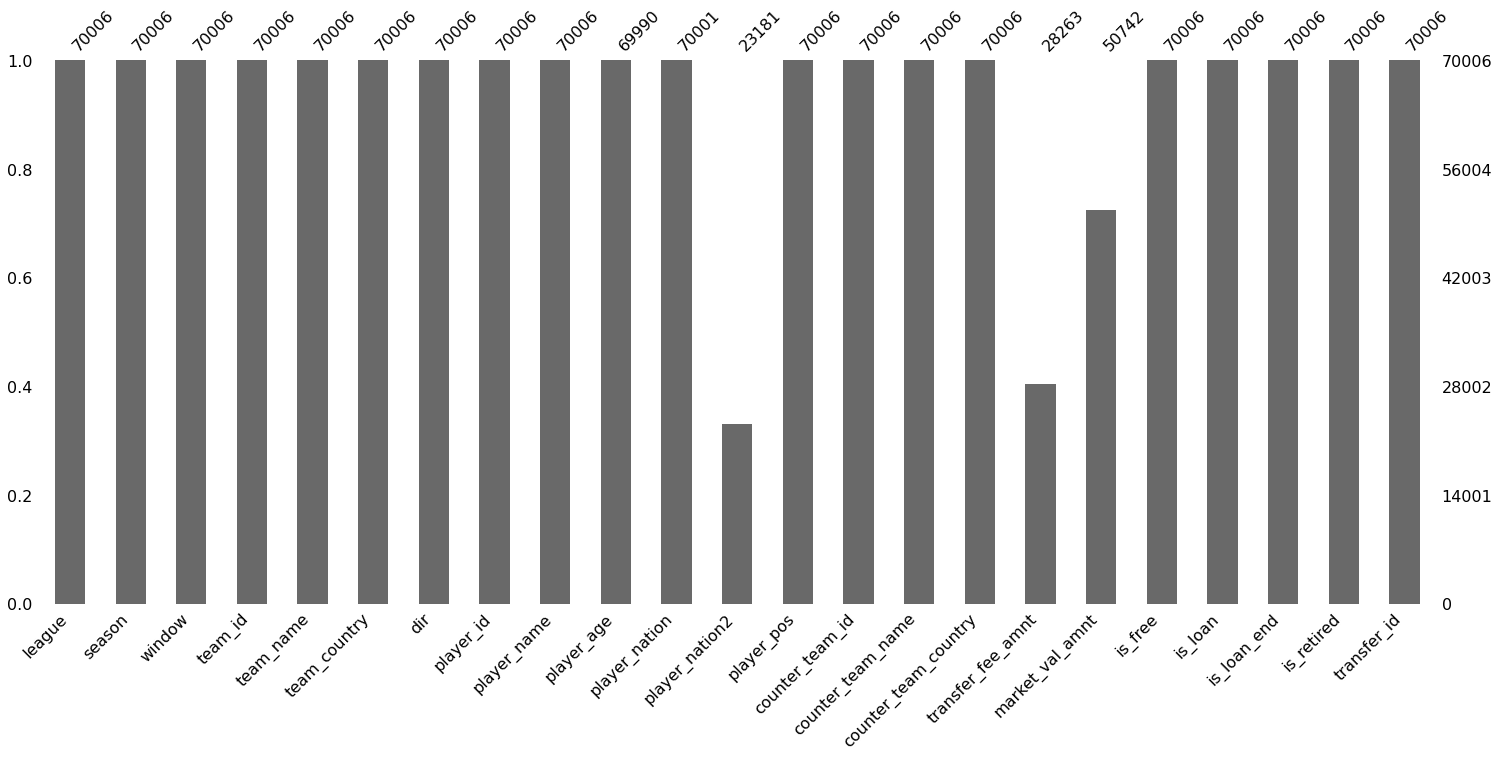

In [ ]:
# display null value of each column
msno.bar(df_cp)


In [ ]:
# create a function to set graph size
def graph_size(x = 12, y = 10):
  plt.figure(figsize = (x, y))
  

(array([11161.,  8704.,     0., 16135.,     0.,  7000.,  8199.,     0.,
        11378.,  7429.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

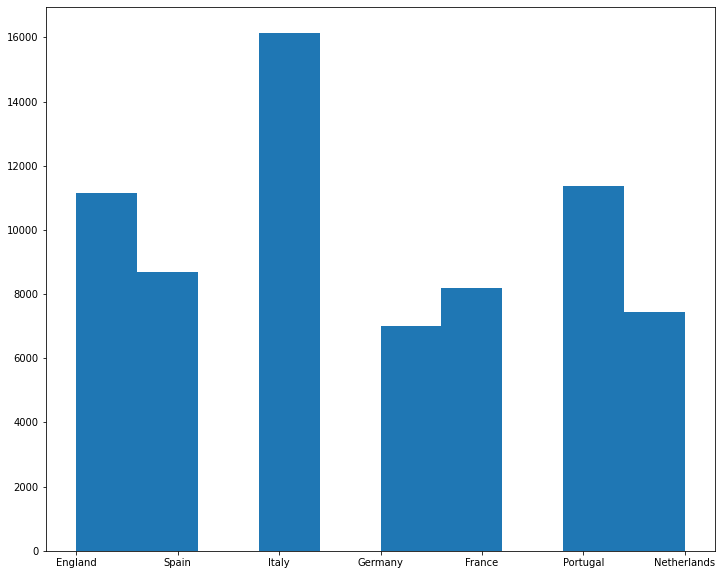

In [ ]:
# display how many players in each league
graph_size()
plt.hist(df['team_country'], bins=10)

<BarContainer object of 7 artists>

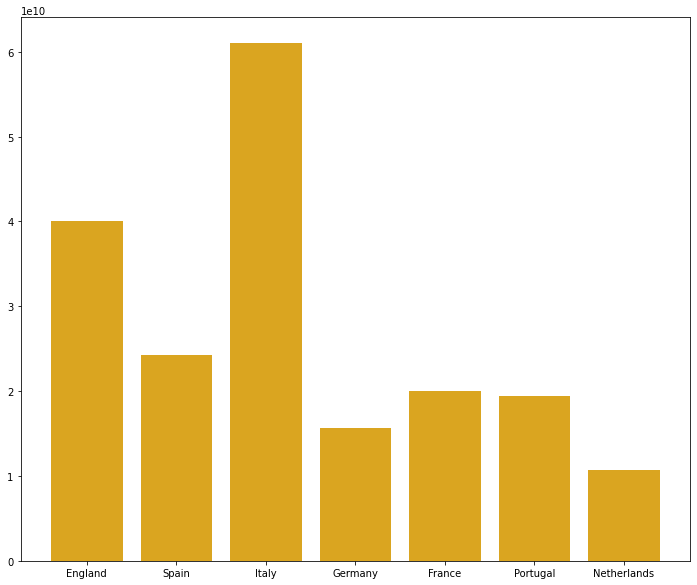

In [ ]:
# Display the total player transfer value of each coutry.
import collections
total = collections.defaultdict(int)
for player, country in zip(df['transfer_fee_amnt'].tolist(),df['team_country'].tolist()):
  total[country] += player

graph_size()
plt.bar(list(total.keys()),list(total.values()), color="goldenrod")

In [ ]:

col = df['team_country'].unique()
mapping = collections.defaultdict(int)

play_na = df['player_nation'].tolist()
mark = df['market_val_amnt'].tolist()
for nation,val in zip(play_na,mark):
        if nation in col:
          mapping[nation] += val


In [ ]:
print(mapping)

defaultdict(<class 'int'>, {'France': 21145902000.0, 'England': 18384828000.0, 'Portugal': 16726628000.0, 'Italy': 20171535000.0, 'Spain': 19918525000.0, 'Netherlands': 10682678000.0, 'Germany': 10599030000.0})


<BarContainer object of 7 artists>

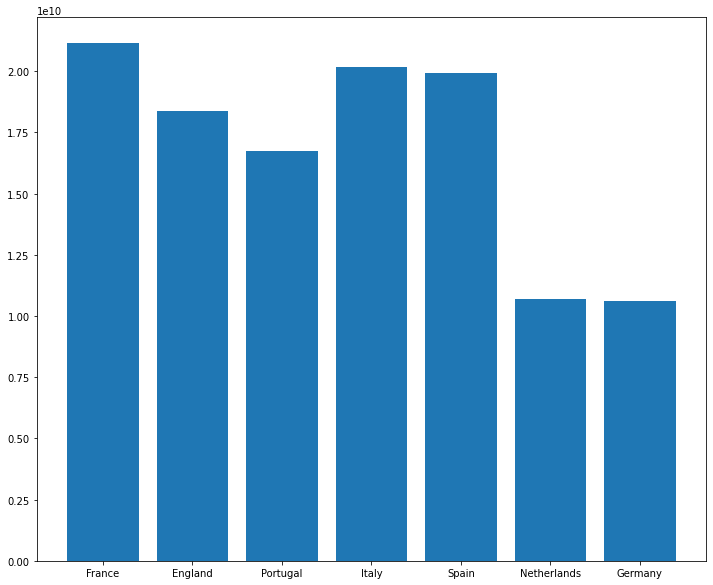

In [ ]:
graph_size()
plt.bar(list(mapping.keys()),list(mapping.values()))

<BarContainer object of 2 artists>

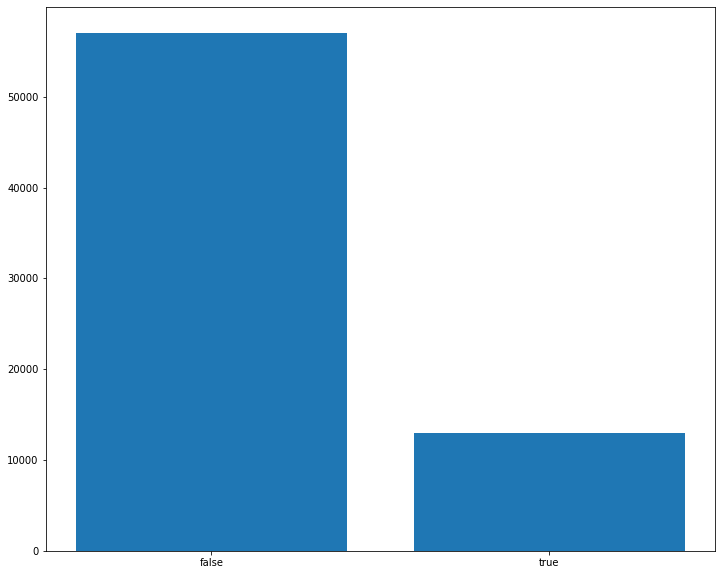

In [ ]:
# to see how many players are free to transfer
graph_size()
total = collections.defaultdict(int)
for val in df['is_free'].tolist():
  total[val] += 1
x = np.array(['false','true'])
y = np.array(list(total.values()))
plt.bar(x,y)

(array([16853.,  4700., 19710.,  6287.,  9334.,  5738.,  5766.,   730.,
          738.,   150.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

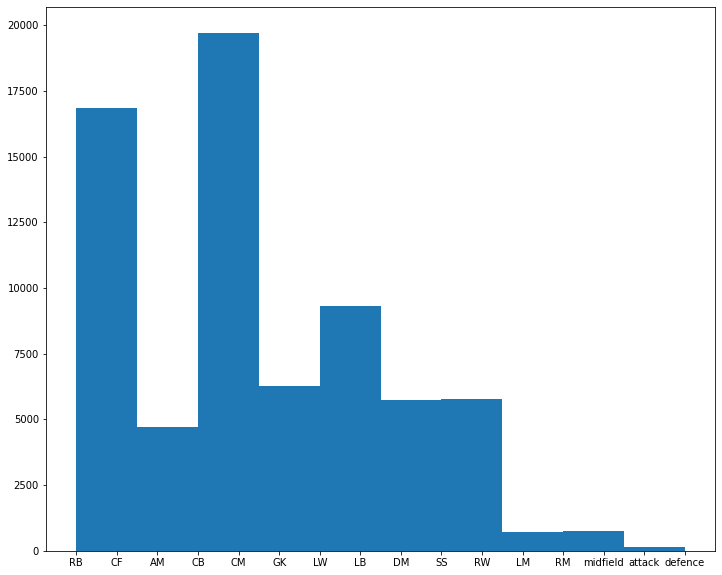

In [ ]:
# see how many players on each position
graph_size()
plt.hist(df['player_pos'])

<BarContainer object of 13 artists>

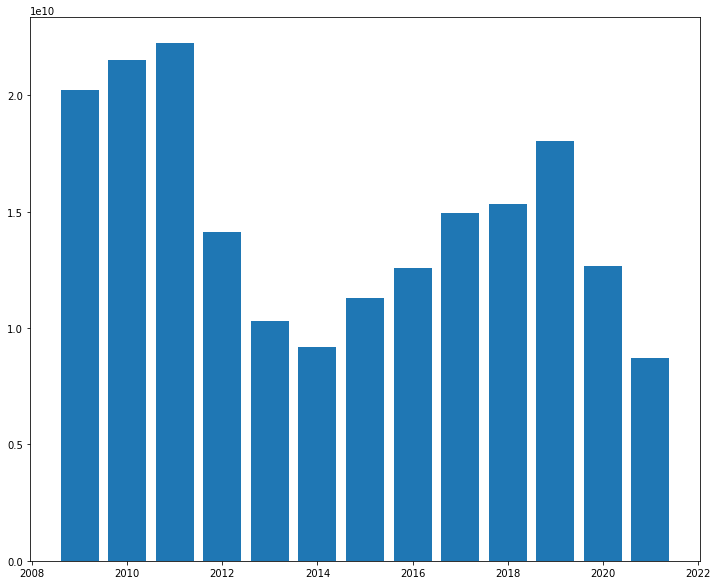

In [ ]:
# the total transfer value of seven leagues  each season

total = collections.defaultdict(int)

for sea,val in zip(df['season'].tolist(),df['transfer_fee_amnt'].tolist()):
  total[sea] += val

graph_size()
plt.bar(list(total.keys()),list(total.values()))

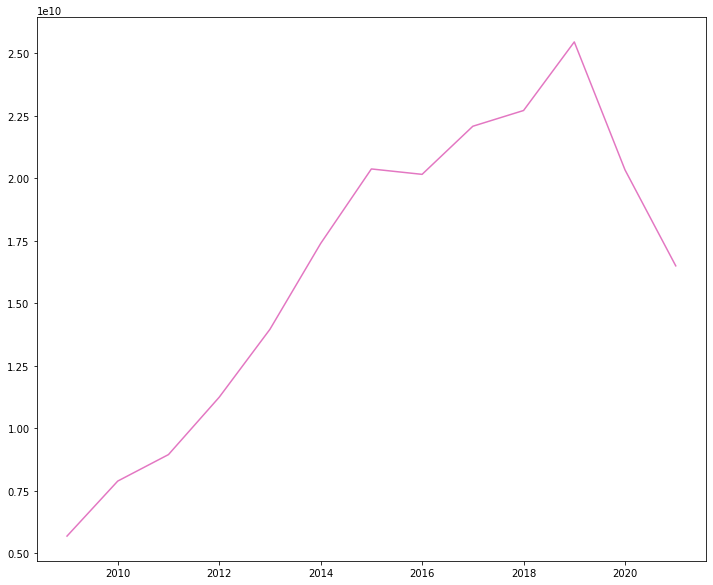

In [ ]:
# the total market value of seven leagues  each season

total = collections.defaultdict(int)

for sea,val in zip(df['season'].tolist(),df['market_val_amnt'].tolist()):
  total[sea] += val

graph_size()
# plt.bar(list(total.keys()),list(total.values()))
plt.plot(list(total.keys()),list(total.values()), color='#e377c2')

(array([56893.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

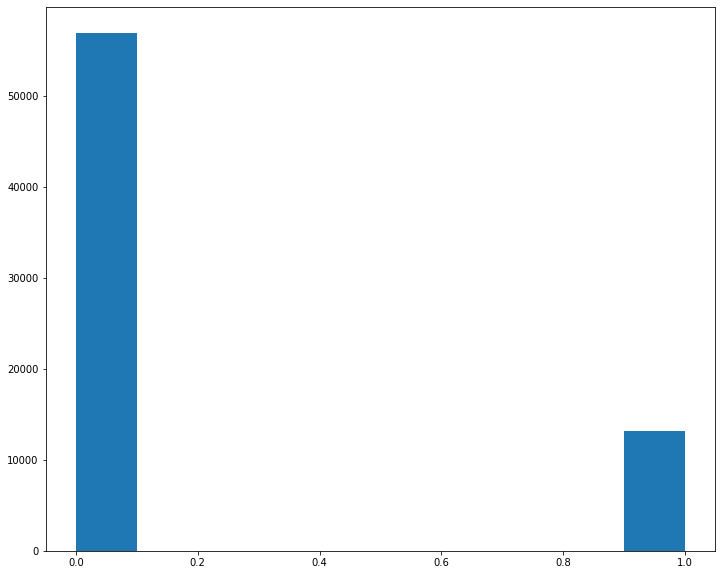

In [ ]:
# show if inexpensive player and expensive play distribution
graph_size()
plt.hist(df['is_expensive'])

{'boxes': [<matplotlib.lines.Line2D at 0x7ff754b293d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff754b303d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff754b37410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff754b30e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff754b29910>,
  <matplotlib.lines.Line2D at 0x7ff754b29e50>]}

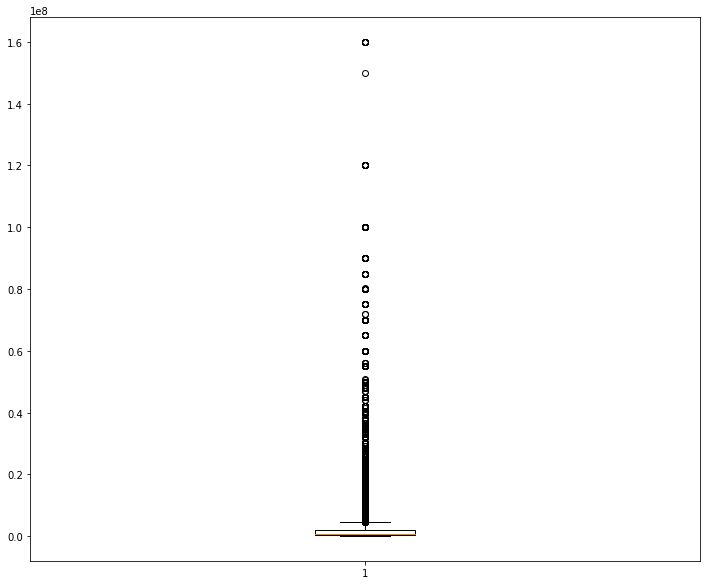

In [ ]:
# boxplot for market value

graph_size()
plt.boxplot(df['market_val_amnt'])

{'boxes': [<matplotlib.lines.Line2D at 0x7ff7539dd690>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff7539e3690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7539ea6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff7539ea190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff7539ddbd0>,
  <matplotlib.lines.Line2D at 0x7ff7539e3150>]}

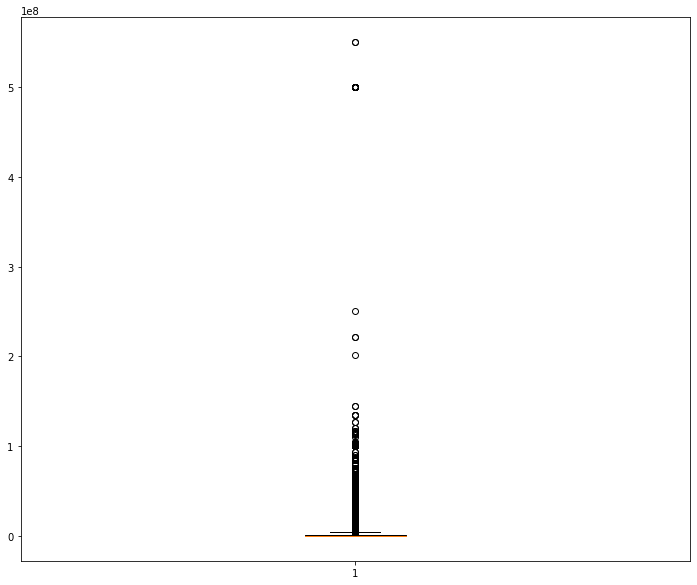

In [ ]:
# boxplot for transfer value
graph_size()
plt.boxplot(df['transfer_fee_amnt'])

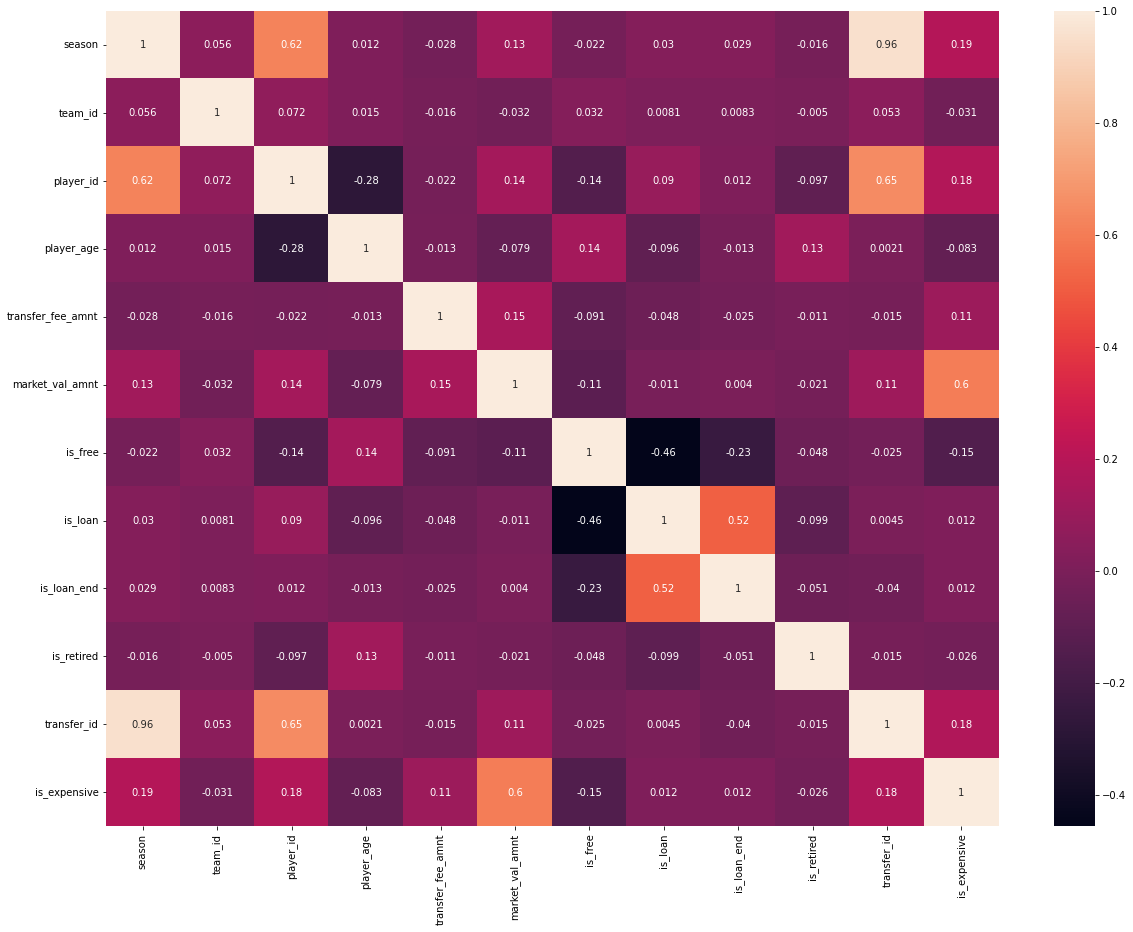

In [ ]:
# heatmap
graph_size(20,15)
sns.heatmap(df.corr(),annot = True)

In [ ]:
#find out the mean spending grouped by each league
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.groupby(['league'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)


league
IT1   3781369.34614
GB1   3592912.85727
ES1   2783556.02022
FR1   2434497.49970
L1    2234183.02857
PO1   1711409.01740
NL1   1443538.21510
Name: transfer_fee_amnt, dtype: float64

In [ ]:
#find out the mean transfer value grouped by each position of the player(outfield and goalie)
df.groupby(['player_pos'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)


player_pos
midfield   5753300.85470
attack     4453869.56522
SS         3685516.32653
CF         3139910.30008
LW         3017263.58039
CB         2910657.95869
CM         2772006.44846
DM         2738980.13245
AM         2720716.46809
RW         2707344.15529
LM         2703795.06849
RM         2638275.04026
RB         2317567.80898
LB         2176921.92362
defence    2091848.27586
GK         1863624.84492
Name: transfer_fee_amnt, dtype: float64

In [ ]:
#find out the mean transfer fee with respect to player country 
df.groupby(['player_nation'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)


player_nation
Malaysia                   33443333.33333
Armenia                    10149609.75610
Somalia                     9944181.81818
Dominican Republic          9475000.00000
Mauritania                  8294153.84615
Uzbekistan                  8041428.57143
Central African Republic    6477421.05263
Costa Rica                  6055700.00000
Tanzania                    4725000.00000
Gabon                       4656451.61290
Italy                       4222400.68640
Belgium                     4043053.51812
Colombia                    3857425.40620
Mexico                      3695078.04878
Kenya                       3688500.00000
Cote d'Ivoire               3644786.27737
Burkina Faso                3586091.66667
Czech Republic              3570617.91908
Bermuda                     3355111.11111
Uruguay                     3339510.01267
Name: transfer_fee_amnt, dtype: float64

In [ ]:
#find out how transfer fee is affected by the type of buying club
df.groupby(['team_name'])['transfer_fee_amnt'].mean().sort_values(ascending=False).head(20)


team_name
AS Bari               12468091.47287
Novara Calcio 1908    11306765.95745
Calcio Catania         9998768.03279
FC Barcelona           9942656.70732
Real Madrid            9290523.80952
Naval 1º de Maio       8259155.17241
AC Cesena              6991298.73418
Manchester United      6714809.52381
FC Internazionale      6547460.48110
Borussia Dortmund      6363347.43590
Atlético de Madrid     5917238.80597
Bayern Munich          5746105.30612
Arsenal FC             5737836.79654
Paris Saint-Germain    5655288.48168
Liverpool FC           5545153.34686
Chelsea FC             5514080.42895
Manchester City        5296486.85897
RB Leipzig             5098491.22807
Juventus FC            4986753.71069
AS Roma                4954679.38540
Name: transfer_fee_amnt, dtype: float64

## Dimensionality reduction

In [ ]:
df.drop(['team_id','player_id','transfer_id'],axis = 1, inplace = True)
#drop loan ended due to high correlinearity with the attribute is_loan, and they also explain the same process 
df.drop(['is_loan_end'],axis = 1, inplace = True)

## Data scaling

In [ ]:
# apply minmax scaler to numeric columns
# transform season ,player_age, transfer_fee_amnt, and market_val_amnt column.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['season' ,'player_age', 'transfer_fee_amnt','market_val_amnt'	]
for col in cols:
  df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1,1))

df.head()

,league,season,window,team_name,team_country,dir,player_name,player_age,player_nation,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_retired,is_expensive
0,GB1,0.00000,s,Manchester United,England,in,Antonio Valencia,0.00624,Ecuador,RB,1071,Wigan Athletic,England,0.03418,0.00275,False,False,False,0
1,GB1,0.00000,s,Manchester United,England,in,Mame Diouf,0.00510,Senegal,CF,687,Molde FK,Norway,0.00818,0.00994,False,False,False,0
2,GB1,0.00000,s,Manchester United,England,in,Gabriel Obertan,0.00454,France,AM,40,FC Girondins Bordeaux,France,0.00727,0.00244,False,False,False,0
3,GB1,0.00000,s,Manchester United,England,in,Michael Owen,0.00964,England,CF,762,Newcastle United,England,0.00000,0.00322,True,False,False,0
4,GB1,0.00000,s,Manchester United,England,in,Scott Moffatt,0.00340,England,CB,5242,Manchester United U18,England,0.00185,0.00181,False,False,False,0


In [ ]:
df.shape

(70006, 19)

In [ ]:
from scipy import stats

#perform chi-square test
target=df['is_expensive'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,19):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(70006.0, 0.0), 14],
 [(69999.4309972633, 0.0), 18],
 [(62004.752389309775, 0.0), 6],
 [(15534.861609030078, 0.0), 13],
 [(10356.422958456427, 0.0), 11],
 [(9930.168907486483, 0.0), 10],
 [(4719.583825646702, 0.0), 3],
 [(2490.6245531794066, 0.0), 1],
 [(2129.406274892309, 0.0), 7],
 [(1563.7253432473021, 3.444007335743343e-225), 8],
 [(1491.512570667032, 0.0), 15],
 [(1370.2736506613946, 5.837117494787256e-209), 12],
 [(885.8369529506431, 4.330403694058307e-188), 4],
 [(885.8369529506431, 4.330403694058307e-188), 0],
 [(304.2546589026428, 3.8980360734568365e-68), 5],
 [(258.5392063032282, 2.1564530343246266e-46), 9],
 [(47.77651195030081, 4.776807098907261e-12), 17],
 [(34.44004955705414, 4.395843302361094e-09), 2],
 [(9.592922399091817, 0.001953288119337897), 16]]

In [ ]:
# check the types
df.dtypes

league                   object
season                  float64
window                   object
team_name                object
team_country             object
dir                      object
player_name              object
player_age              float64
player_nation            object
player_pos               object
counter_team_id          object
counter_team_name        object
counter_team_country     object
transfer_fee_amnt       float64
market_val_amnt         float64
is_free                    bool
is_loan                    bool
is_retired                 bool
is_expensive              int64
dtype: object

In [ ]:
# turn categorical into numeric by using labelencoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['league']=lb.fit_transform(df['league'])
df['window']=lb.fit_transform(df['window'])
df['team_name']=lb.fit_transform(df['team_name'])
df['team_country']=lb.fit_transform(df['team_country'])
df['player_nation']=lb.fit_transform(df['player_nation'])
df['dir']=lb.fit_transform(df['dir'])
df['player_name']=lb.fit_transform(df['player_name'])
df['player_pos']=lb.fit_transform(df['player_pos'])
df['counter_team_id']=lb.fit_transform(df['counter_team_id'])
df['counter_team_name']=lb.fit_transform(df['counter_team_name'])
df['counter_team_country']=lb.fit_transform(df['counter_team_country'])


In [ ]:
df.head()

,league,season,window,team_name,team_country,dir,player_name,player_age,player_nation,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_retired,is_expensive
0,2,0.00000,0,137,0,0,1478,0.00624,45,9,109,3541,35,0.03418,0.00275,False,False,False,0
1,2,0.00000,0,137,0,0,10033,0.00510,135,2,2827,2225,83,0.00818,0.00994,False,False,False,0
2,2,0.00000,0,137,0,0,5587,0.00454,54,0,2051,1343,38,0.00727,0.00244,False,False,False,0
3,2,0.00000,0,137,0,0,11324,0.00964,48,2,2979,2331,35,0.00000,0.00322,True,False,False,0
4,2,0.00000,0,137,0,0,14667,0.00340,48,1,2482,2181,35,0.00185,0.00181,False,False,False,0


In [ ]:
#we use min max scaler to normalize the dataframe
from sklearn.preprocessing import MinMaxScaler

cols = df.columns
scaler = MinMaxScaler()
for col in cols:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1, 1))
df.head()

,league,season,window,team_name,team_country,dir,player_name,player_age,player_nation,player_pos,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_retired,is_expensive
0,0.33333,0.00000,0.00000,0.56612,0.00000,0.00000,0.08642,0.00624,0.26946,0.60000,0.03246,0.98116,0.28226,0.03418,0.00275,0.00000,0.00000,0.00000,0.00000
1,0.33333,0.00000,0.00000,0.56612,0.00000,0.00000,0.58666,0.00510,0.80838,0.13333,0.84187,0.61651,0.66935,0.00818,0.00994,0.00000,0.00000,0.00000,0.00000
2,0.33333,0.00000,0.00000,0.56612,0.00000,0.00000,0.32669,0.00454,0.32335,0.00000,0.61078,0.37213,0.30645,0.00727,0.00244,0.00000,0.00000,0.00000,0.00000
3,0.33333,0.00000,0.00000,0.56612,0.00000,0.00000,0.66214,0.00964,0.28743,0.13333,0.88714,0.64589,0.28226,0.00000,0.00322,1.00000,0.00000,0.00000,0.00000
4,0.33333,0.00000,0.00000,0.56612,0.00000,0.00000,0.85762,0.00340,0.28743,0.06667,0.73913,0.60432,0.28226,0.00185,0.00181,0.00000,0.00000,0.00000,0.00000


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# select k best
#importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#declaring target as Total Users column
target = df['is_expensive']
#dropping Total Users from the features
features = df.drop(['is_expensive','market_val_amnt','transfer_fee_amnt','dir','is_free','is_retired'],axis = 1).copy()
#fitting the columns into their respective positions
select_kbest = SelectKBest(f_regression,k = 6).fit(features,target)
features_kbest = select_kbest.get_support()
#printing results from kbest
print('chosen features: ', features.columns[features_kbest],'\n')

select_kbest.scores_

chosen features:  Index(['league', 'season', 'window', 'team_country', 'player_age',
       'counter_team_country'],
      dtype='object') 



array([5.50556422e+02, 2.54772829e+03, 3.45960076e+01, 7.33762820e+00,
       3.45670499e+02, 1.32581408e+00, 4.81721014e+02, 1.14761317e+01,
       1.08086270e+01, 7.26030833e+00, 8.60973012e+00, 1.74221926e+02,
       9.65413911e+00])

Very interesting to see the features that are outputted here. I would have normally expected to see player position or the counter team name(the team that is selling the player) to be included.

In [ ]:
# Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator = lr, n_features_to_select = 5 , step = 1)

rfe.fit(features,target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['league', 'season', 'team_country', 'player_age',
       'counter_team_country'],
      dtype='object')


#SMOTE

In [ ]:
#SMOTE the data since there is too many cases of not_expensive players and few expensive players in comparison
from imblearn.over_sampling import SMOTE

y = df['is_expensive']
#declaring the features
X = df[['league','season','player_age','is_free','player_nation']]
#our test and train split for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

X_train.shape, y_train.shape

((90998, 5), (90998,))

We tried fitting the data without balancing it but the results in recall when we did our performance metrics using the classification report were terrible. It is paramount that we balance this dataset to see improvements in those metrics.

#Classifiers

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
#instance for our svc
clf = svm.SVC()
#fitting our model
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X,y)

0.6140187983887095

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.59      0.71     11394
         1.0       0.29      0.72      0.41      2608

    accuracy                           0.62     14002
   macro avg       0.59      0.65      0.56     14002
weighted avg       0.79      0.62      0.66     14002



In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[6749, 4645],
       [ 743, 1865]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6537183290419777


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


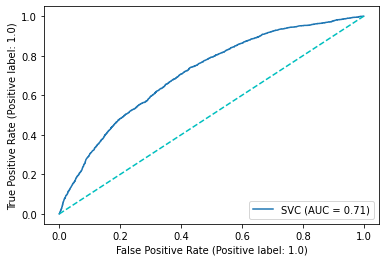

In [ ]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'support vector classifier');
plt.show()

In [ ]:
#SMOTE the data since there is too many cases of not_expensive players and few expensive players in comparison
from imblearn.over_sampling import SMOTE

y = df['is_expensive']
#declaring the features
X = df[['league','season','player_age','player_pos','player_nation','counter_team_name']]
#our test and train split for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

X_train.shape, y_train.shape

((91068, 6), (91068,))

In [ ]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestClassifier()
model = forest.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X,y)

0.9686026911978973

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     11359
         1.0       0.65      0.48      0.55      2643

    accuracy                           0.85     14002
   macro avg       0.77      0.71      0.73     14002
weighted avg       0.84      0.85      0.84     14002



In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[10685,   674],
       [ 1373,  1270]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.7105891788034157


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


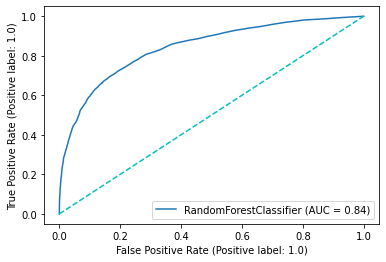

In [ ]:
metrics.plot_roc_curve(forest, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'random forest classifier');
plt.show()

In [ ]:
# decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
model = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.score(X,y)

0.7265091563580265

In [ ]:
#  print classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82     11359
         1.0       0.34      0.48      0.39      2643

    accuracy                           0.72     14002
   macro avg       0.60      0.63      0.61     14002
weighted avg       0.77      0.72      0.74     14002



In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[8875, 2484],
       [1383, 1260]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6290248827878188


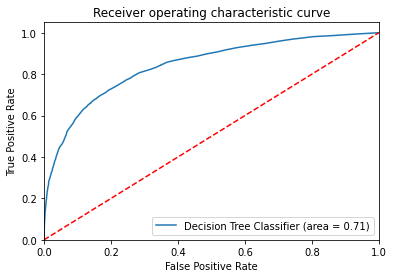

In [ ]:
#referred from M_Fried_M8_assn notebook
# create roc graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

In [ ]:
# gaussian model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X,y)

0.6032625774933578

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.58      0.71     11359
         1.0       0.28      0.71      0.41      2643

    accuracy                           0.61     14002
   macro avg       0.59      0.65      0.56     14002
weighted avg       0.78      0.61      0.65     14002



In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(y_test, y_pred)
#print results 
test_conf_mat

array([[6610, 4749],
       [ 755, 1888]])

In [ ]:
# print roc score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('auc score:', auc)

auc score: 0.6481285938631937


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


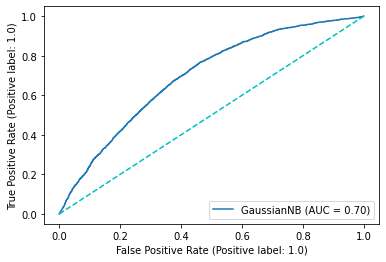

In [ ]:
metrics.plot_roc_curve(gnb, X_test, y_test) 
plt.plot([0, 1], [0, 1], 'c--', label = 'naive classifier');
plt.show()

## Conclusion

* Our project began with issues finding a dataset until we ultimately landed on one our group member was passionate about. Which is how we landed upon the football transfer database. Working with this dataset turned out to create some issues the response variable we wanted to work with had a lot of NaN values, at this point we had to make a decision one, we use our domain knowledge to drop all the rows that had NaN variables where transfer market fee was NaN's because from our domain knowledge we knew a lot of clubs do not disclose their player transfer details including the fee. However this would have severly cut our dataset by more than 60% which is why we came upon the decision to use KNN imputer to fill the NaN values. This strategy was successful because the rows were grouped by the club which bought the players "team_name", we did this because the rows are sorted by club which meant we can look to our neighbors to fill the NaN values which are relevant and would give us the most accurate evaluations. 

* With our new dataframe we began Exploratory Data Analysis, we gained a lot of information from univariate and multivariate graphs. At this point we created a new column to our dataframe that would determine whether a player was considered expensive or not. The threshold for determining whether they were expensive was the mean of "market_val_amt", if they were lower than the mean they were not considered expensive however if they were over it they were categorized as expensive.  With the new column we did data scaling to normalize our data.

* We trained the dataframe without balancing the data first(response variable) however it resulted in extremely bad scores for f1, recall, and precision for our true values (1). As a result we looked into SMOTE to balance our data and then we began to write our four models (SVC,Random Forest Classifier, Gaussian Naive Bayes, Decision Tree Model) and then we compared the results of the models by classification report and the ROC Curve.

* Ultimately we decided that the ensemble model, Random Forest Classifier was the best out of the four we made based on Model Score, the curve of the ROC Score and f1-score.

* **Issues we encountered:** A couple of issues we encountered was KNN imputer took 5 minutes to run and SVC took 15 minutes. This made working on our project extremely time consuming. 

* **Result of Research Question:**  We were also able to answer our hypothesis and we came to realize it was wrong England was not the highest market value but rather France. This could be explained due to recent world cup winnings in 2018 which might have inflated the evaluations of the French playerbase. France was closely followed by Italy then Spain.